# K-Nearest Neighbors 

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.


<p align="center">
    <img src="KNN1.png" width="800">
</p>

### Algorithm of KNN

1. Select the number K of the neighbors.
2. Calculate the Euclidean distance of K number of neighbors.
3. Take the K nearest neighbors as per the calculated Euclidean distance.
4. Among these k neighbors, count the number of the data points in each category.
5. Assign the new data points to that category for which the number of the neighbor is maximum.

### Selection of K value

Divide your data into train and tuning (validation) set. Do not use test set for this purpose. Use the validation set to tune your k and find the one that works for your problem.Another method is to use Schwarz Criterion.


### Task
In this project, I will build a KNN model from scratch and also use the knn model imported form scikit-learn. Then compare the result or these models.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
data = pd.read_csv('diabetes.csv') 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

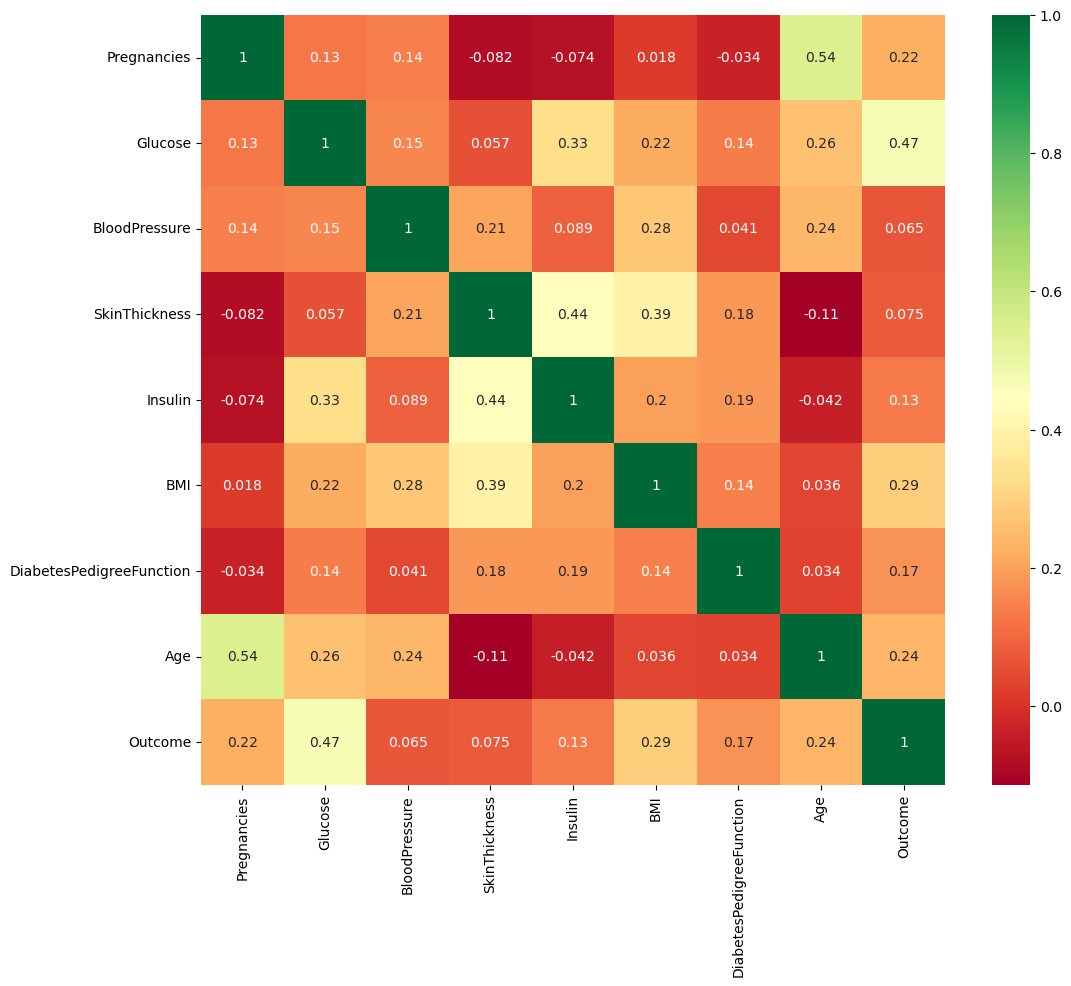

In [8]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, cmap='RdYlGn') 

For this assignment, I will use two factors: Pregnancies and Glucose to predict the outcome. Since We can see Pregnanciesy and Glucose are related to the outcome and they are not very dependent on each other.

In [9]:

data = data[['Pregnancies', 'Glucose', 'Outcome']]
data.head()

,Pregnancies,Glucose,Outcome
0,6,148,1
1,1,85,0
2,8,183,1
3,1,89,0
4,0,137,1


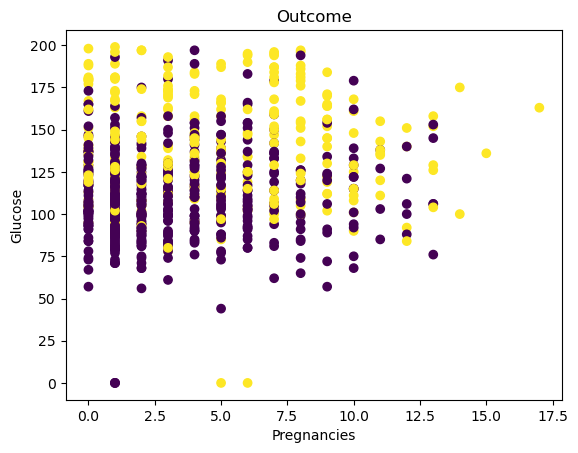

In [10]:
plt.scatter(data['Pregnancies'], data['Glucose'], c = data['Outcome'])
plt.xlabel('Pregnancies')
plt.ylabel('Glucose')
plt.title('Outcome')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop(['Outcome'], axis = 1).to_numpy()
y = data['Outcome'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=42)

In [12]:
def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):
    neighbors = []
    for i, p in enumerate(training_features):
        d = distance(point, p)
        temp_data = [p, training_labels[i], d]
        neighbors.append(temp_data)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [13]:
def KNN_Predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    if regression == False:
        labels = [x[1] for x in neighbors]
        return max(labels, key = labels.count)
    
    else:
        return sum(x[1] for x in neighbors)/k

In [14]:

def classification_error(test_features, 
                         test_labels,
                         training_features, 
                         training_labels,
                         k):
    error = 0
    for i, point in enumerate(test_features):
        if test_labels[i] != KNN_Predict(point, 
                                               training_features, 
                                               training_labels, 
                                               k):
          error = error + 1
    return error/i

In [15]:
K = 5
classification_error(X_test, y_test, X_train, y_train, 5)

0.32679738562091504

Based on the result, we can know that by K = 5, we have 32.7% misclassification for our model. In the following, I will try to optimize the K value, and I will try to use the least K value to reach the lowest classification error rate.

/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


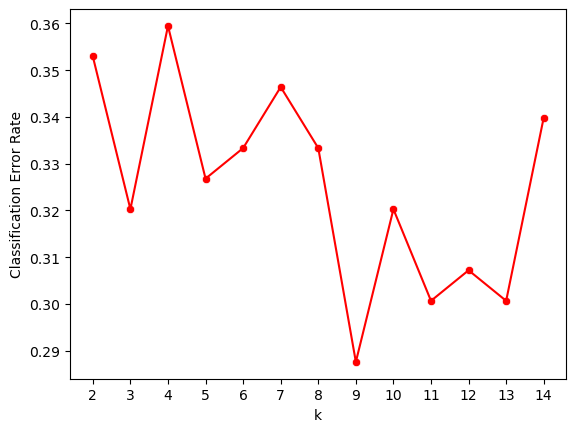

In [37]:
possible_k = [x for x in range(2,15,1)]
error_rate = errors = [classification_error(X_test,
                               y_test,
                               X_train,
                               y_train, k) for k in possible_k]

sns.lineplot(possible_k, error_rate, color = 'red')
sns.scatterplot(possible_k, error_rate, color = 'red')
plt.xlabel('k')
plt.ylabel('Classification Error Rate')
plt.xticks(possible_k)
plt.show()

From the result above, we can say K = 9 is the best K value for our model for this dataset. When K gets more than 9, the model starts getting overfitting.

In [38]:
classification_error(X_test, y_test, X_train, y_train, 9)

0.2875816993464052

The error is better than last time.

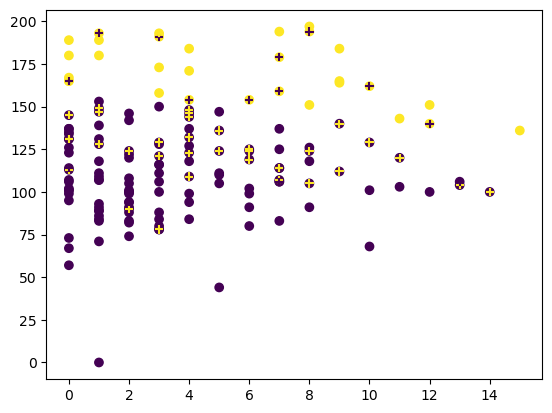

In [17]:
predicted_labels = [KNN_Predict(point, X_train, 
                                y_train, 
                                40) for point in X_test]
plt.scatter(X_test[:, 0], X_test[:, 1], c = predicted_labels)

plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, marker = '+')

### Use Scikit-learn KNeighbors model

In [23]:
# Create a KNN model
knn = KNeighborsClassifier(n_neighbors =5)
knn.fit (X_train, y_train)
y_pred = knn.predict (X_test)
print ("Training Accuracy:", knn.score(X_train, y_train))
print ("Testing  Accuracy:", knn.score(X_test, y_test))

Training Accuracy: 0.8045602605863192
Testing  Accuracy: 0.6818181818181818


/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

In [24]:
confusion_matrix = confusion_matrix (y_test, y_pred)
print (confusion_matrix)

[[81 19]
 [30 24]]


In [25]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       100
           1       0.56      0.44      0.49        54

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



In [26]:
score_k =[]
for k in range (3, 15):
    knn_k =KNeighborsClassifier (n_jobs=-1, n_neighbors =k)
    knn_k.fit (X_train, y_train)
    y_pred_k = knn_k.predict (X_test)
    score = knn_k.score(X_test, y_test)
    score_k.append (score.mean ())

/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

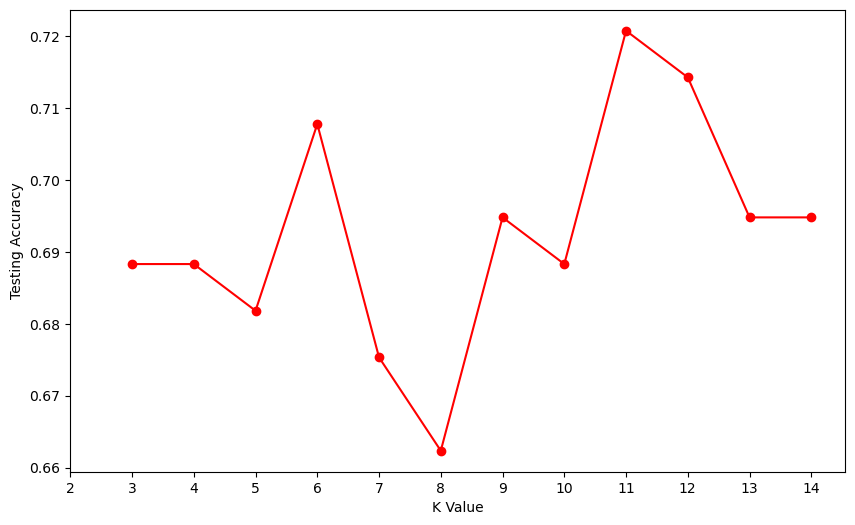

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(3,15), score_k,marker='o',color = 'red')
plt.xlabel ('K Value')
plt.ylabel ('Testing Accuracy')
plt.xticks (range (2,15,1))
plt.show()

In [40]:
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing accuracy:", accuracy)

Testing accuracy: 0.6623376623376623


/Users/xueqilu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


It shows that when K = 8, the model has the highest accuracy. 

By comparing the two model, the KNN model that I built from scratch has better accuracy.